In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
!ls

CMAPSSData.zip	sample_data


In [5]:
!unzip CMAPSSData.zip

Archive:  CMAPSSData.zip
  inflating: Damage Propagation Modeling.pdf  
  inflating: readme.txt              
  inflating: RUL_FD001.txt           
  inflating: RUL_FD002.txt           
  inflating: RUL_FD003.txt           
  inflating: RUL_FD004.txt           
  inflating: test_FD001.txt          
  inflating: test_FD002.txt          
  inflating: test_FD003.txt          
  inflating: test_FD004.txt          
  inflating: train_FD001.txt         
  inflating: train_FD002.txt         
  inflating: train_FD003.txt         
  inflating: train_FD004.txt         


In [22]:
# Noms des colonnes (selon NASA)
columns = ['unit', 'cycle'] + \
          [f'op_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None)
test_df  = pd.read_csv('test_FD001.txt',  sep='\s+', header=None)
rul_df   = pd.read_csv('RUL_FD001.txt',   header=None)

train_df.columns = columns
test_df.columns  = columns
rul_df.columns   = ['RUL_true']

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-715490427.py:6: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None)
/tmp/ipython-input-715490427.py:7: SyntaxWarning: invalid escape sequence '\s'
  test_df  = pd.read_csv('test_FD001.txt',  sep='\s+', header=None)


In [23]:
columns = ['unit', 'cycle'] + \
          [f'op_{i}' for i in range(1,4)] + \
          [f'sensor_{i}' for i in range(1,22)]

train_df = pd.read_csv('train_FD001.txt', sep=' ', header=None)
train_df = train_df.iloc[:, :26]
train_df.columns = columns
train_df.head()

unit  cycle    op_1    op_2   op_3  sensor_1  sensor_2  sensor_3  sensor_4  \
0     1      1 -0.0007 -0.0004  100.0    518.67    641.82   1589.70   1400.60   
1     1      2  0.0019 -0.0003  100.0    518.67    642.15   1591.82   1403.14   
2     1      3 -0.0043  0.0003  100.0    518.67    642.35   1587.99   1404.20   
3     1      4  0.0007  0.0000  100.0    518.67    642.35   1582.79   1401.87   
4     1      5 -0.0019 -0.0002  100.0    518.67    642.37   1582.85   1406.22   

   sensor_5  ...  sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  \
0     14.62  ...     521.66    2388.02    8138.62     8.4195       0.03   
1     14.62  ...     522.28    2388.07    8131.49     8.4318       0.03   
2     14.62  ...     522.42    2388.03    8133.23     8.4178       0.03   
3     14.62  ...     522.86    2388.08    8133.83     8.3682       0.03   
4     14.62  ...     522.19    2388.04    8133.80     8.4294       0.03   

   sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0        392       2388      100.0      39.06    23.4190  
1        392       2388      100.0      39.00    23.4236  
2        390       2388      100.0      38.95    23.3442  
3        392       2388      100.0      38.88    23.3739  
4        393       2388      100.0      38.90    23.4044  

[5 rows x 26 columns]

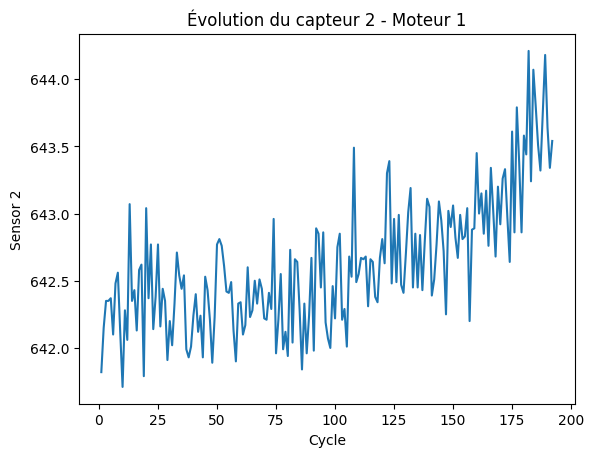

In [24]:
engine_1 = train_df[train_df['unit'] == 1]

plt.figure()
plt.plot(engine_1['cycle'], engine_1['sensor_2'])
plt.xlabel('Cycle')
plt.ylabel('Sensor 2')
plt.title('Évolution du capteur 2 - Moteur 1')
plt.show()

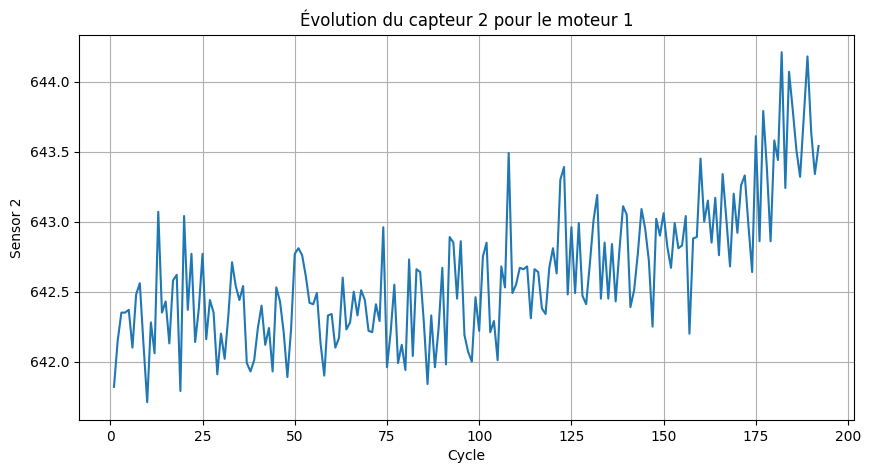

In [25]:
plt.figure(figsize=(10,5))
plt.plot(engine_data['cycle'], engine_data['sensor_2'])
plt.xlabel('Cycle')
plt.ylabel('Sensor 2')
plt.title('Évolution du capteur 2 pour le moteur 1')
plt.grid(True)
plt.show()


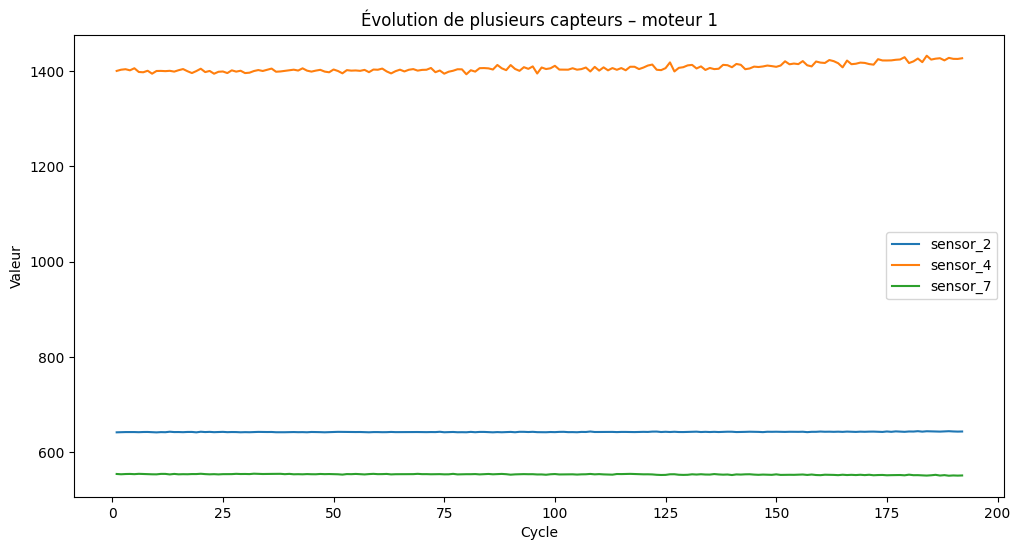

In [26]:
plt.figure(figsize=(12,6))
plt.plot(engine_data['cycle'], engine_data['sensor_2'], label='sensor_2')
plt.plot(engine_data['cycle'], engine_data['sensor_4'], label='sensor_4')
plt.plot(engine_data['cycle'], engine_data['sensor_7'], label='sensor_7')
plt.legend()
plt.xlabel('Cycle')
plt.ylabel('Valeur')
plt.title('Évolution de plusieurs capteurs – moteur 1')
plt.show()


In [27]:
sensor_cols = [col for col in train_df.columns if 'sensor' in col]

constant_sensors = [col for col in sensor_cols if train_df[col].std() == 0]
constant_sensors

['sensor_18', 'sensor_19']

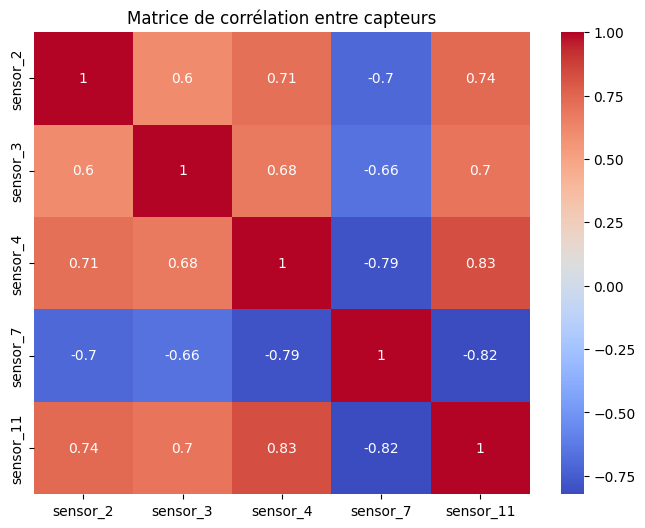

In [28]:
selected_sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11']

plt.figure(figsize=(8,6))
sns.heatmap(train_df[selected_sensors].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre capteurs')
plt.show()

In [30]:
constant_cols = [col for col in train_df.columns
                 if train_df[col].nunique() <= 1]

train_df.drop(columns=constant_cols, inplace=True)
test_df.drop(columns=constant_cols, inplace=True)


In [31]:
max_cycle = train_df.groupby('unit')['cycle'].max()

train_df['RUL'] = train_df.apply(
    lambda row: max_cycle[row['unit']] - row['cycle'],
    axis=1
)

In [32]:
import pandas as pd
pd.set_option('display.max_rows', None)

train_df[['unit', 'cycle', 'RUL']]


unit  cycle    RUL
0         1      1  191.0
1         1      2  190.0
2         1      3  189.0
3         1      4  188.0
4         1      5  187.0
5         1      6  186.0
6         1      7  185.0
7         1      8  184.0
8         1      9  183.0
9         1     10  182.0
10        1     11  181.0
11        1     12  180.0
12        1     13  179.0
13        1     14  178.0
14        1     15  177.0
15        1     16  176.0
16        1     17  175.0
17        1     18  174.0
18        1     19  173.0
19        1     20  172.0
20        1     21  171.0
21        1     22  170.0
22        1     23  169.0
23        1     24  168.0
24        1     25  167.0
25        1     26  166.0
26        1     27  165.0
27        1     28  164.0
28        1     29  163.0
29        1     30  162.0
30        1     31  161.0
31        1     32  160.0
32        1     33  159.0
33        1     34  158.0
34        1     35  157.0
35        1     36  156.0
36        1     37  155.0
37        1     38  154.0
38        1     39  153.0
39        1     40  152.0
40        1     41  151.0
41        1     42  150.0
42        1     43  149.0
43        1     44  148.0
44        1     45  147.0
45        1     46  146.0
46        1     47  145.0
47        1     48  144.0
48        1     49  143.0
49        1     50  142.0
50        1     51  141.0
51        1     52  140.0
52        1     53  139.0
53        1     54  138.0
54        1     55  137.0
55        1     56  136.0
56        1     57  135.0
57        1     58  134.0
58        1     59  133.0
59        1     60  132.0
60        1     61  131.0
61        1     62  130.0
62        1     63  129.0
63        1     64  128.0
64        1     65  127.0
65        1     66  126.0
66        1     67  125.0
67        1     68  124.0
68        1     69  123.0
69        1     70  122.0
70        1     71  121.0
71        1     72  120.0
72        1     73  119.0
73        1     74  118.0
74        1     75  117.0
75        1     76  116.0
76        1     77  115.0
77        1     78  114.0
78        1     79  113.0
79        1     80  112.0
80        1     81  111.0
81        1     82  110.0
82        1     83  109.0
83        1     84  108.0
84        1     85  107.0
85        1     86  106.0
86        1     87  105.0
87        1     88  104.0
88        1     89  103.0
89        1     90  102.0
90        1     91  101.0
91        1     92  100.0
92        1     93   99.0
93        1     94   98.0
94        1     95   97.0
95        1     96   96.0
96        1     97   95.0
97        1     98   94.0
98        1     99   93.0
99        1    100   92.0
100       1    101   91.0
101       1    102   90.0
102       1    103   89.0
103       1    104   88.0
104       1    105   87.0
105       1    106   86.0
106       1    107   85.0
107       1    108   84.0
108       1    109   83.0
109       1    110   82.0
110       1    111   81.0
111       1    112   80.0
112       1    113   79.0
113       1    114   78.0
114       1    115   77.0
115       1    116   76.0
116       1    117   75.0
117       1    118   74.0
118       1    119   73.0
119       1    120   72.0
120       1    121   71.0
121       1    122   70.0
122       1    123   69.0
123       1    124   68.0
124       1    125   67.0
125       1    126   66.0
126       1    127   65.0
127       1    128   64.0
128       1    129   63.0
129       1    130   62.0
130       1    131   61.0
131       1    132   60.0
132       1    133   59.0
133       1    134   58.0
134       1    135   57.0
135       1    136   56.0
136       1    137   55.0
137       1    138   54.0
138       1    139   53.0
139       1    140   52.0
140       1    141   51.0
141       1    142   50.0
142       1    143   49.0
143       1    144   48.0
144       1    145   47.0
145       1    146   46.0
146       1    147   45.0
147       1    148   44.0
148       1    149   43.0
149       1    150   42.0
150       1    151   41.0
151       1    152   40.0
152       1    153   39.0
153

In [33]:
train_df.loc[
    train_df.groupby('unit')['cycle'].idxmax(),
    ['unit', 'cycle', 'RUL']
]


unit  cycle  RUL
191       1    192  0.0
478       2    287  0.0
657       3    179  0.0
846       4    189  0.0
1115      5    269  0.0
1303      6    188  0.0
1562      7    259  0.0
1712      8    150  0.0
1913      9    201  0.0
2135     10    222  0.0
2375     11    240  0.0
2545     12    170  0.0
2708     13    163  0.0
2888     14    180  0.0
3095     15    207  0.0
3304     16    209  0.0
3580     17    276  0.0
3775     18    195  0.0
3933     19    158  0.0
4167     20    234  0.0
4362     21    195  0.0
4564     22    202  0.0
4732     23    168  0.0
4879     24    147  0.0
5109     25    230  0.0
5308     26    199  0.0
5464     27    156  0.0
5629     28    165  0.0
5792     29    163  0.0
5986     30    194  0.0
6220     31    234  0.0
6411     32    191  0.0
6611     33    200  0.0
6806     34    195  0.0
6987     35    181  0.0
7145     36    158  0.0
7315     37    170  0.0
7509     38    194  0.0
7637     39    128  0.0
7825     40    188  0.0
8041     41    216  0.0
8237     42    196  0.0
8444     43    207  0.0
8636     44    192  0.0
8794     45    158  0.0
9050     46    256  0.0
9264     47    214  0.0
9495     48    231  0.0
9710     49    215  0.0
9908     50    198  0.0
10121    51    213  0.0
10334    52    213  0.0
10529    53    195  0.0
10786    54    257  0.0
10979    55    193  0.0
11254    56    275  0.0
11391    57    137  0.0
11538    58    147  0.0
11769    59    231  0.0
11941    60    172  0.0
12126    61    185  0.0
12306    62    180  0.0
12480    63    174  0.0
12763    64    283  0.0
12916    65    153  0.0
13118    66    202  0.0
13431    67    313  0.0
13630    68    199  0.0
13992    69    362  0.0
14129    70    137  0.0
14337    71    208  0.0
14550    72    213  0.0
14763    73    213  0.0
14929    74    166  0.0
15158    75    229  0.0
15368    76    210  0.0
15522    77    154  0.0
15753    78    231  0.0
15952    79    199  0.0
16137    80    185  0.0
16377    81    240  0.0
16591    82    214  0.0
16884    83    293  0.0
17151    84    267  0.0
17339    85    188  0.0
17617    86    278  0.0
17795    87    178  0.0
18008    88    213  0.0
18225    89    217  0.0
18379    90    154  0.0
18514    91    135  0.0
18855    92    341  0.0
19010    93    155  0.0
19268    94    258  0.0
19551    95    283  0.0
19887    96    336  0.0
20089    97    202  0.0
20245    98    156  0.0
20430    99    185  0.0
20630   100    200  0.0

In [34]:
features = [col for col in train_df.columns
            if col not in ['unit', 'cycle', 'RUL']]

X_train = train_df[features]
y_train = train_df['RUL']

In [35]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


In [36]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
test_last = test_df.loc[
    test_df.groupby('unit')['cycle'].idxmax()
]


In [39]:
X_test = test_last[features]
X_test_scaled = scaler.transform(X_test)


In [40]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)


In [41]:
rmse_lr = np.sqrt(mean_squared_error(rul_df, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(rul_df, y_pred_rf))

print("RMSE Régression Linéaire :", rmse_lr)
print("RMSE Random Forest :", rmse_rf)


RMSE Régression Linéaire : 32.04109478174272
RMSE Random Forest : 34.34213966834332


In [42]:
results = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf]
})

results


Modèle       RMSE
0  Régression Linéaire  32.041095
1        Random Forest  34.342140

In [43]:
RUL_CAP = 125
train_df['RUL'] = train_df['RUL'].clip(upper=RUL_CAP)

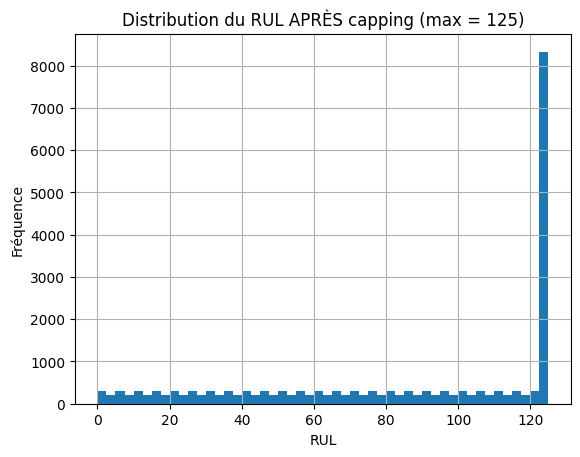

In [44]:
plt.figure()
train_df['RUL'].hist(bins=50)
plt.title("Distribution du RUL APRÈS capping (max = 125)")
plt.xlabel("RUL")
plt.ylabel("Fréquence")
plt.show()


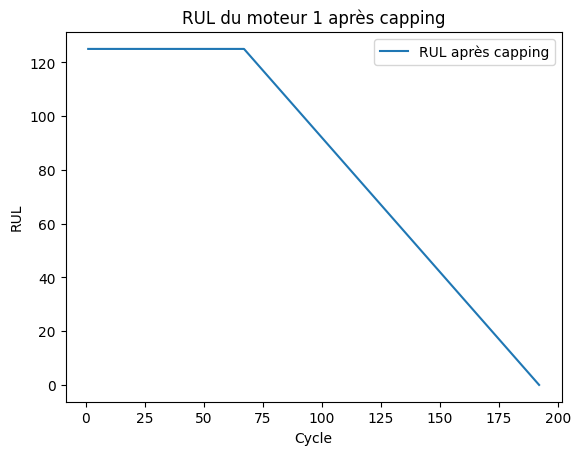

In [45]:
engine_1 = train_df[train_df['unit'] == 1]

plt.figure()
plt.plot(engine_1['cycle'], engine_1['RUL'], label='RUL après capping')
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.title("RUL du moteur 1 après capping")
plt.legend()
plt.show()


In [46]:
train_df['RUL'].max()

125.0

In [47]:
importances = rf.feature_importances_
pd.Series(importances, index=features).sort_values(ascending=False).head(10)

sensor_11    0.435001
sensor_9     0.123988
sensor_4     0.092096
sensor_12    0.043996
sensor_7     0.037335
sensor_14    0.036898
sensor_15    0.033032
sensor_21    0.031560
sensor_3     0.028482
sensor_2     0.027251
dtype: float64